In [1]:
library(reticulate)
use_condaenv(condaenv="pyr2", conda="/data8t_0/hms/anaconda3/bin/conda")
# umap<-import('umap')

In [9]:
library(Seurat)
library(data.table)
library(ggplot2)
library(flexclust)
datasetName = "Bladder_PartialTissue_HCLAdultBladder1"
#datasetName value: organ_tissue_authorYear without space
dataFormat = 'tsv'
#dataFormat value: tsv (tab separated), 10X (sparse)

setwd("/stor/public/hcad/Bladder_PartialTissue_HCLAdultBladder1/")

In [10]:
# Load the organized dataset
if(dataFormat == 'tsv'){
    data.matrix <- read.table(paste0(datasetName,"_expression.tsv.gz"),h = T,sep='\t',row.names = 1)
} else{
   system(paste0("tar -zxvf ", datasetName, "_expression.tsv.gz")) #Invoke the unix command
   data.matrix <- Read10X(data.dir = paste0(datasetName,"_expression"))
   # data.dir: Directory containing the matrix.mtx, genes.tsv (or features.tsv), and barcodes.tsv files provided by 10X.
}
# Load the metadata and annotation
data.metadata <- read.table(file = paste0(datasetName,"_metadata.tsv"), h = T, sep = "\t", row.names = 5)
data.annotation <- read.table(file = paste0(datasetName,"_annotation.tsv"), h = T, sep = "\t", row.names = 1)
if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    data.annotation2 <- read.table(file = paste0(datasetName,"_annotation2.tsv"), h = T, sep = "\t", row.names = 1)
}

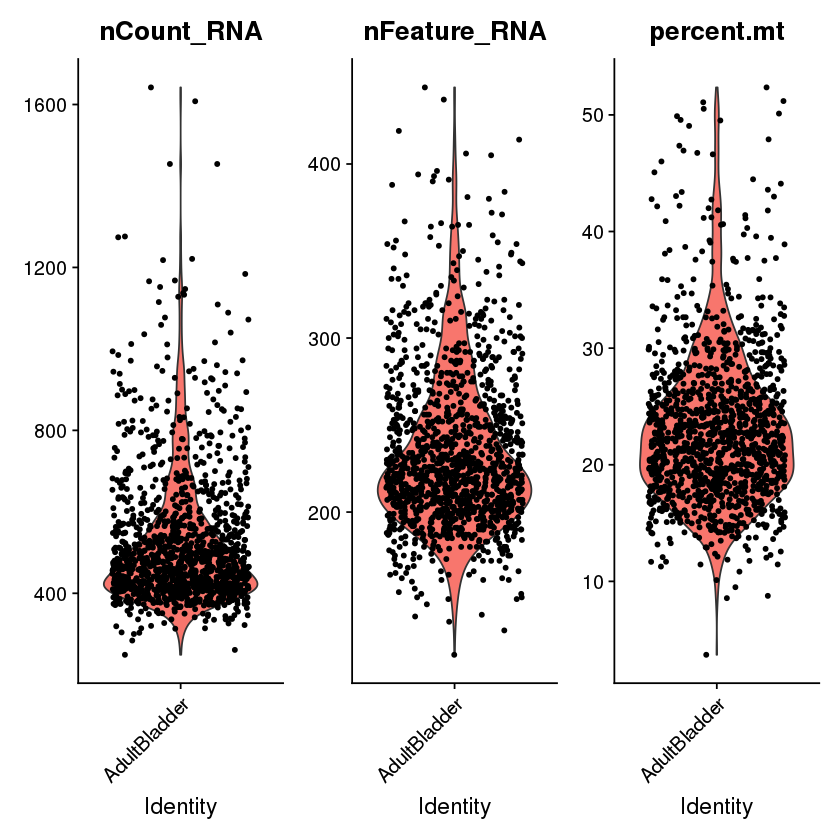

In [19]:
# Pre-processing
min.cells = 100
min.features = 100
nFeature_RNA_range = c(min.features, 1000)
percent.mt.thre = 1
# Modify the default value of these parameters according to original paper
dataobj <- CreateSeuratObject(counts = data.matrix, project = datasetName, min.cells = min.cells, min.features = min.features, meta.data = data.metadata)
dataobj <- AddMetaData(dataobj, metadata = data.annotation)

if (file.exists(paste0(datasetName,"_annotation2.tsv"))) {
    dataobj <- AddMetaData(dataobj, metadata = data.annotation2)
}

# QC
dataobj[["percent.mt"]] <- PercentageFeatureSet(dataobj, pattern = "^[Mm][Tt]")
VlnPlot(object = dataobj, features= c("nCount_RNA","nFeature_RNA","percent.mt"))

In [15]:
percent.mt.thre = 40
dataobj <- subset(dataobj, subset = nFeature_RNA > nFeature_RNA_range[1] & nFeature_RNA < nFeature_RNA_range[2] & percent.mt < percent.mt.thre)

In [20]:
warnings('off')
# Normalization
# Two approaches
# 1. run standard log normalization 
dataobj <- NormalizeData(dataobj, normalization.method = "LogNormalize", scale.factor = 10000)
dataobj <- FindVariableFeatures(dataobj) # default feature number, nfeatures = 2000
dataobj <- ScaleData(dataobj, features = VariableFeatures(dataobj))
# 2. run sctransform 
dataobj <- SCTransform(dataobj, vars.to.regress = "percent.mt", do.correct.umi = TRUE, do.scale = TRUE, do.center = TRUE)

Centering and scaling data matrix

Calculating cell attributes for input UMI matrix

Variance stabilizing transformation of count matrix of size 930 by 1267

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 930 genes, 1267 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Second step: Get residuals using fitted parameters for 930 genes



  |======================================================================| 100%


Computing corrected count matrix for 930 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 20.65814 secs

Determine variable features

Set 930 variable features

Place corrected count matrix in counts slot

Regressing out percent.mt

Centering and scaling data matrix

Set default assay to SCT



PC_ 1 
Positive:  DCN, FTL, MGP, LUM, FTH1, RPS27, GPX3, S100A4, APOD, C1R 
	   ADH1B, MFAP4, EFEMP1, C1S, CFD, TNFAIP6, MT-ND4L, FBLN1, MGST1, MT-ND4 
	   SERPING1, MTATP6P1, NUPR1, DPT, LGALS1, CTSK, SOD2, ID2, H3F3B, S100A6 
Negative:  CD74, AQP1, HLA-DRA, B2M, HLA-DRB1, SELE, HLA-B, TM4SF1, ACKR1, PLVAP 
	   IFI27, HLA-DPA1, RND1, MT-RNR2, TPT1, PECAM1, PCAT19, TGFBR2, SPARCL1, EMCN 
	   ESAM, IGFBP4, ICAM1, C2CD4B, HLA-DPB1, EMP1, EPAS1, RAMP3, MYL12A, APOLD1 
PC_ 2 
Positive:  TAGLN, MYL6, ADIRF, ACTA2, RGS5, TPM2, DSTN, MYL9, LGALS1, NDUFA4 
	   HSPB1, ACTB, CALM2, S100A6, PFN1, S100A4, S100A11, CALM1, COX7A2, SH3BGRL3 
	   FABP4, SPARC, COX20, MGST3, CRIP2, ATP5E, CFL1, NDUFA12, GAPDH, FN1 
Negative:  ZFP36, JUNB, FOS, FTL, SOD2, IER3, JUN, EGR1, DCN, FOSB 
	   NEAT1, ADH1B, HSPA1A, SEPP1, DUSP1, EFEMP1, FBLN1, CFD, SOCS3, ZFP36L1 
	   PNRC1, KLF4, TNFAIP6, ATF3, NFKBIA, PPP1R15A, C1R, APOD, HSPA1B, SERPING1 
PC_ 3 
Positive:  IFITM3, RPS27, NNMT, RPS18, RPL21, CDKN1A, RPS19, S

png 
  2

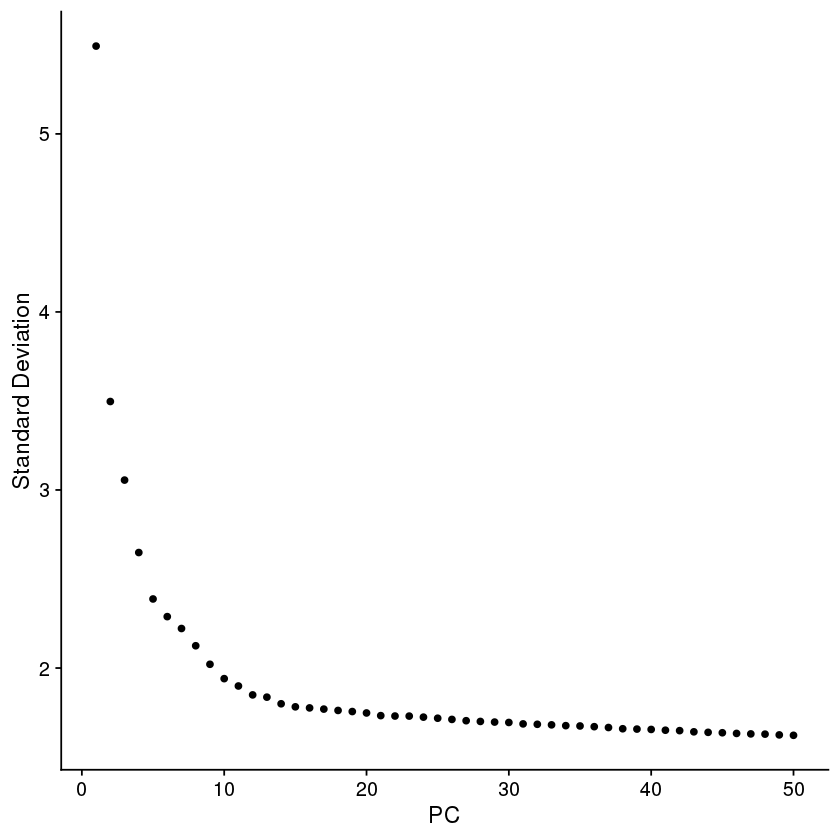

In [21]:
# Dimensional Reduction
dataobj <- RunPCA(dataobj, features = VariableFeatures(object = dataobj),npcs=50)
# Determine the ‘dimensionality’ of the dataset according to elbow plot
pdf(paste0(datasetName,"seurat.elbowplot.pdf"))
ElbowPlot(dataobj,ndim=50) 
dev.off()
ElbowPlot(dataobj,ndim=50) 

In [22]:
pcDim = 30 # set as 75 in this case 

# Cluster the cells
dataobj <- FindNeighbors(dataobj, reduction = "pca", dims = 1:pcDim, nn.eps = 0.5)

Computing nearest neighbor graph

Computing SNN



In [23]:
dataobj <- FindClusters(dataobj, resolution = 1.3, n.start = 5)
randIndex(dataobj$cell_cluster,dataobj$seurat_clusters)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1267
Number of edges: 73628

Running Louvain algorithm...
Maximum modularity in 5 random starts: 0.4908
Number of communities: 8
Elapsed time: 0 seconds


ARI 
0.5145448

In [24]:
rr <- RunUMAP(dataobj,dims=1:pcDim)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:33:51 UMAP embedding parameters a = 0.9922 b = 1.112

09:33:51 Read 1267 rows and found 30 numeric columns

09:33:51 Using Annoy for neighbor search, n_neighbors = 30

09:33:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

09:33:52 Writing NN index file to temp file /tmp/RtmpIbFYam/file1d7d64838dfc

09:33:52 Searching Annoy index using 1 thread, search_k = 3000

09:33:52 Annoy recall = 100%

09:33:53 Commencing smooth kNN distance calibration using 1 thread

09:33:53 Initializing fr

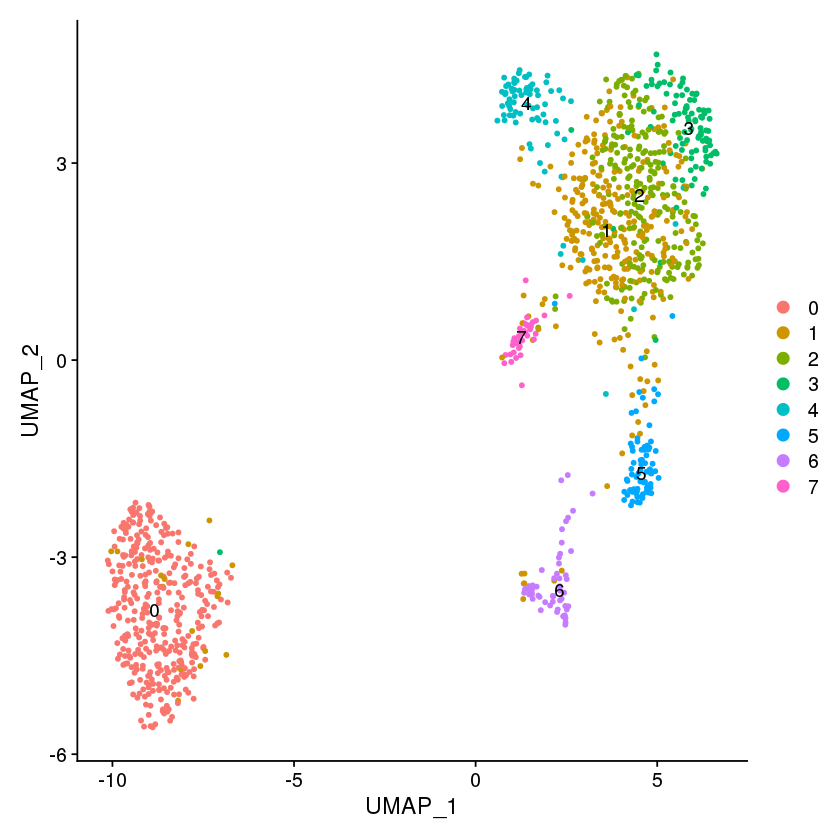

In [25]:
p_umap=DimPlot(rr,label = TRUE, pt.size=1)
ggsave(paste0(datasetName,".seurat.umap.tiff"), plot = p_umap, width = 8, height = 5)
p_umap

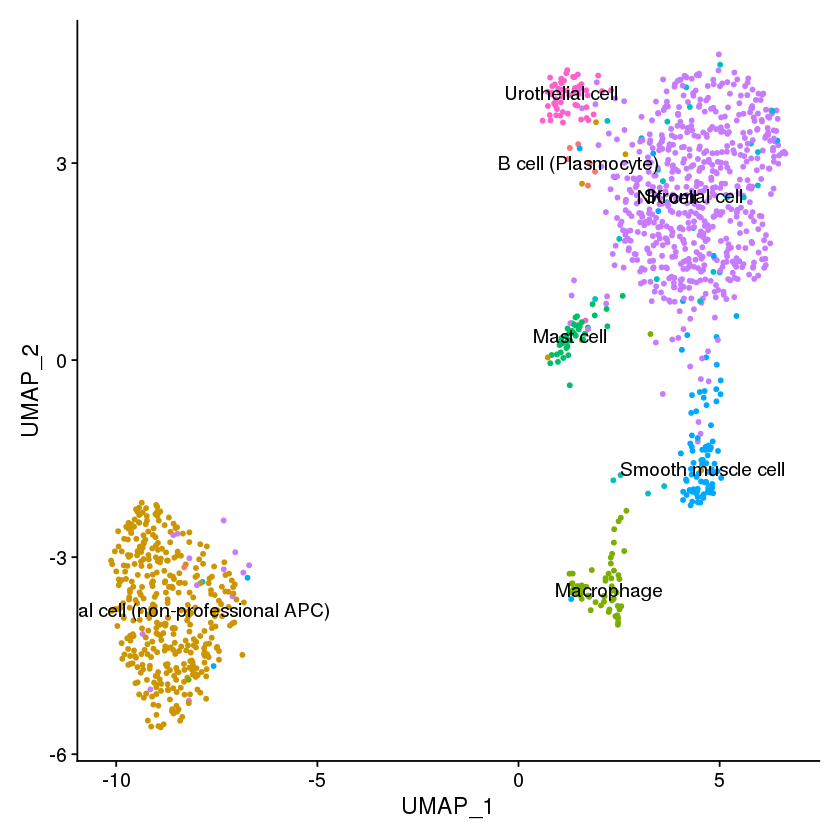

In [26]:
p_umap2 <- DimPlot(rr, reduction = "umap", label = T, group.by = "cell_cluster", pt.size=1)+NoLegend()
ggsave(paste0(datasetName,".seurat.umap_orig.tiff"), plot = p_umap2, width = 8, height = 5)
p_umap2

In [54]:
new.cluster.ids <- c("Bladder-Epithelial tissue-Endothelial cell-AQP1", 
                     "Bladder-Connective tissue-Stromal cell-LUM", 
                     "Bladder-Connective tissue-Stromal cell-DCN", 
                     "Bladder-Connective tissue-Stromal cell-CXCL14", 
                     "Bladder-Epithelial tissue-Urothelial cell-S100P",
                     "Bladder-Muscle tissue-Smooth muscle cell-ACTA2",
                     "Bladder-Connective tissue-Macrophage-CXCL3 ",
                     "Bladder-Connective tissue-Mast cell-CPA3 "
                    
                    )

In [55]:
subset(dataobj.markers,cluster=='7')
# subset(dataobj.markers,gene=='LYVE1')

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
TPSAB1,5.868914e-72,1.8242816,0.950,0.092,5.458090e-69,7,TPSAB1
CPA3,2.383644e-70,1.1077707,0.800,0.055,2.216789e-67,7,CPA3
CD69,4.481229e-56,1.0834754,0.725,0.058,4.167543e-53,7,CD69
TPSB2,4.959558e-54,2.2278619,1.000,0.169,4.612389e-51,7,TPSB2
ARHGDIB,2.176594e-30,0.6092968,0.650,0.091,2.024232e-27,7,ARHGDIB
SRGN1,1.357487e-23,0.9939007,0.850,0.249,1.262463e-20,7,SRGN
RGS11,8.153344e-22,0.7307935,0.575,0.098,7.582610e-19,7,RGS1
FCER1G1,4.977446e-21,0.4485188,0.475,0.068,4.629025e-18,7,FCER1G
BIRC3,3.350018e-18,0.6128985,0.575,0.121,3.115517e-15,7,BIRC3


In [56]:
names(x = new.cluster.ids) <- levels(x = dataobj)
annodataobj <- RenameIdents(object = dataobj, new.cluster.ids)

In [57]:
rr2 <- RunUMAP(annodataobj,dims=1:pcDim)

10:04:11 UMAP embedding parameters a = 0.9922 b = 1.112

10:04:11 Read 1267 rows and found 30 numeric columns

10:04:11 Using Annoy for neighbor search, n_neighbors = 30

10:04:11 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*

|

10:04:12 Writing NN index file to temp file /tmp/RtmpIbFYam/file1d7d4b35c9db

10:04:12 Searching Annoy index using 1 thread, search_k = 3000

10:04:12 Annoy recall = 100%

10:04:13 Commencing smooth kNN distance calibration using 1 thread

10:04:14 Initializing from normalized Laplacian + noise

10:04:14 Commencing optimization for 500 epochs, with 50836 positive edges

10:04:18 Optimization finished



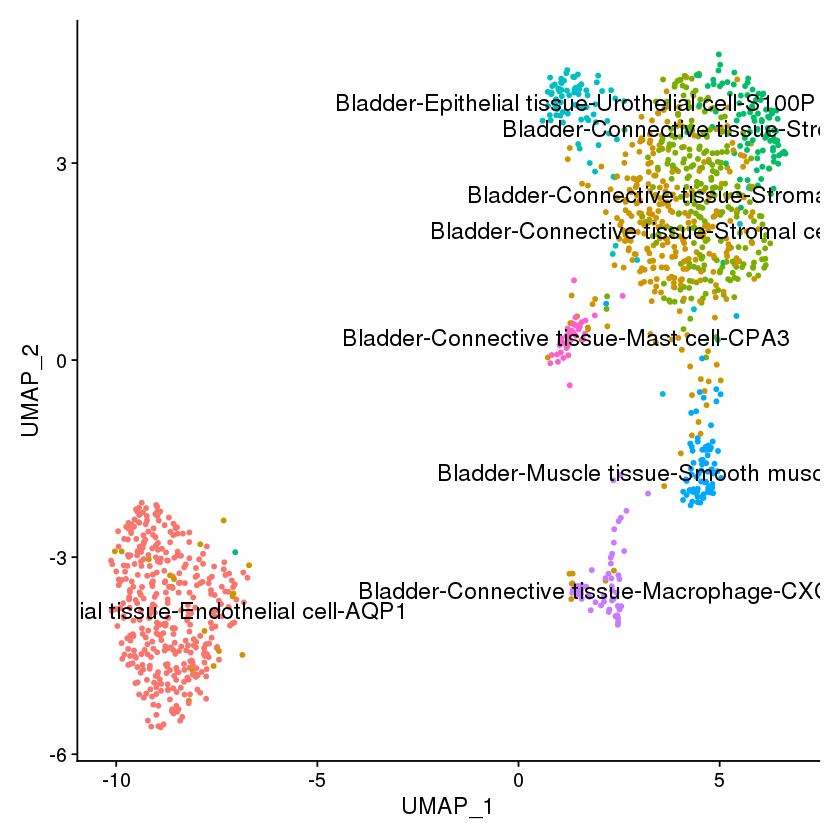

In [58]:
p_umap4 <- UMAPPlot(rr2,label = T, pt.size=1,label.size=5)+NoLegend()
# LabelClusters(plot = p_umap4, id = 'ident', color = 'white')
ggsave(paste0(datasetName,".seurat.umap_hcad.tiff"), plot = p_umap4, width = 25, height = 15)
p_umap4

In [27]:
dataobj.markers <- FindAllMarkers(dataobj, only.pos = TRUE,)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



In [59]:

write.table(dataobj.markers, file = paste0(datasetName,".seurat.markers.txt"), sep = "\t", quote = F, row.names = F, col.names = T)
# 
dataobj<-AddMetaData(dataobj, metadata =as.character(annodataobj@active.ident),col.name='hcad.label') 

write.table(cbind(colnames(dataobj), dataobj$hcad.label), file = paste0(datasetName,"_annotation.hcad.tsv"), sep = "\t", quote = F, row.names = F, col.names = c('cell_ID','cell_cluster'))

saveRDS(dataobj, file = paste0(datasetName,".seuratobj.rds"))